In [4]:
from config import *
from model_bal import *
import monai

In [5]:
idxx = 25
directory = "img_25_1"

ckpt = "epoch=117-val_loss=0.92-val_f1=0.80.ckpt"

net = balance_resnet()
net = net.to(device)
checkpoint = torch.load(ckpt, map_location=device)
net.load_state_dict(checkpoint["state_dict"])
test_dataloader = DataLoader(test_dataset_bal, batch_size=1, num_workers=NUM_WORKERS)


images, labels = test_dataset_bal[idxx]
input = torch.squeeze(images)
input = images
input.requires_grad = True    
input = torch.unsqueeze(input, axis=0)
net = net.eval()
input = input.to(device)
labels = labels.to(device)


In [8]:
target_layer = "model.layer4"

gradcam = monai.visualize.GradCAM(nn_module=net, target_layers=target_layer)

In [9]:
from monai.transforms import Rotate90 # for some reason images are rotated.. so need this for visualization

In [11]:
net = net.to(device)

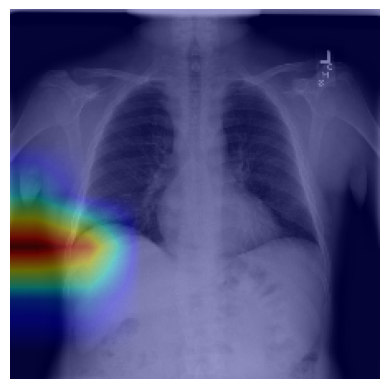

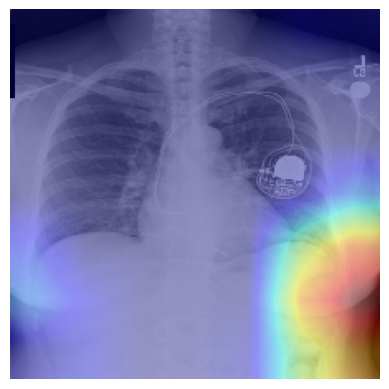

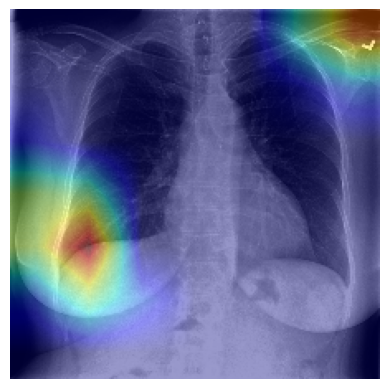

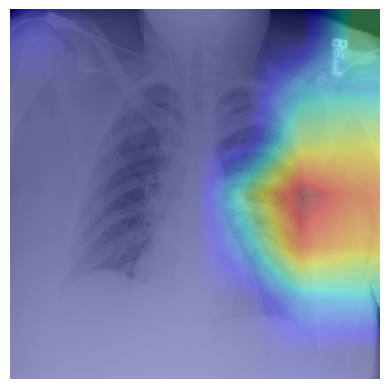

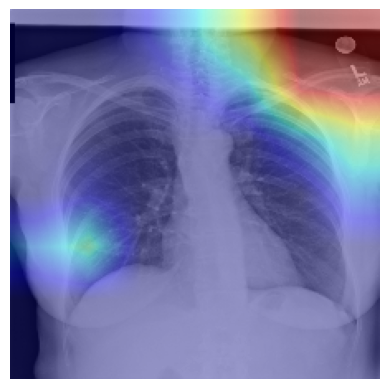

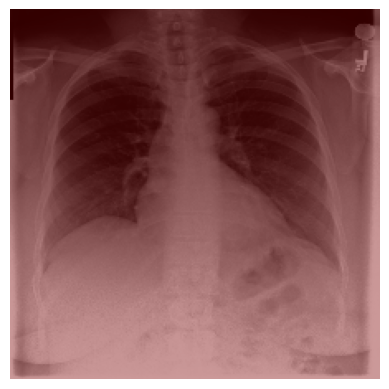

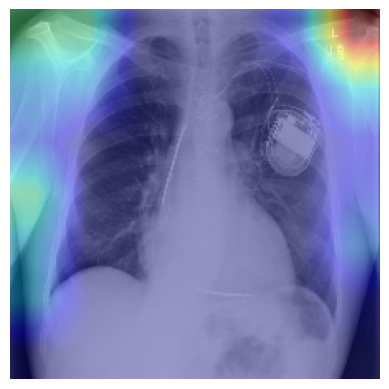

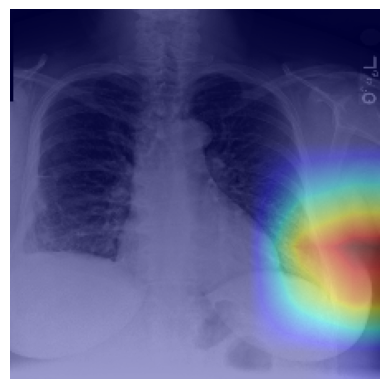

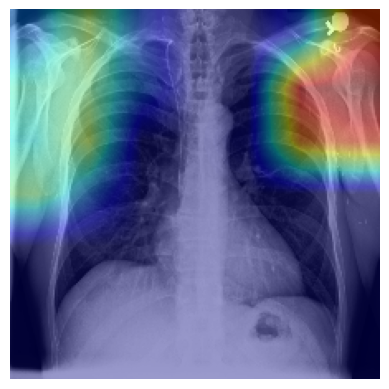

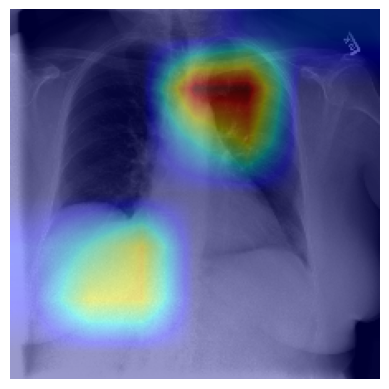

In [24]:
counter = 0
for i in test_dataloader:
    img, label = i
    img = img.to(device)
    label = label.to(device)
    logits = net(img)
    pred= torch.argmax(logits)
    if pred!=label & label==0:
        counter+=1
        res_cam = gradcam(x=img, class_idx=label)
        img = np.squeeze(img.detach().cpu())
        res_cam = np.squeeze(res_cam.detach().cpu())
        plt.imshow(img, cmap='gray')
        plt.imshow(res_cam, cmap='jet_r', alpha=0.4)
        plt.axis('off')
        plt.show()
    if counter==10:
        break